In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
df=pd.read_csv('house_price.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


# Data Cleaning

In [5]:
# Rename the columns
df.rename(columns={'longitude':'Longitude','latitude':'Latitude','housing_median_age':'Housing_median_age','total_rooms':'Total_rooms',
                  'total_bedrooms':'Total_bedrooms','population':'Population','households':'Households','median_income':'Median_income',
                  'ocean_proximity':'Ocean_proximity','median_house_value':'House_value'},inplace=True)
df.head()

,Longitude,Latitude,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Ocean_proximity,House_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [9]:
# Find missing value counts in each column
df.isnull().sum()

Longitude               0
Latitude                0
Housing_median_age      0
Total_rooms             0
Total_bedrooms        207
Population              0
Households              0
Median_income           0
Ocean_proximity         0
House_value             0
dtype: int64

In [11]:
# handle missing value in total_bedrooms column
df['Total_bedrooms']=df['Total_bedrooms'].fillna(df['Total_bedrooms'].mean())
# recheck for missing values
df.isnull().sum()

Longitude             0
Latitude              0
Housing_median_age    0
Total_rooms           0
Total_bedrooms        0
Population            0
Households            0
Median_income         0
Ocean_proximity       0
House_value           0
dtype: int64

In [13]:
# Check for duplicate records
df.duplicated().sum()

0

In [15]:
# Check the data type of DataFrame columns
col_name=df.columns
for col in col_name:
    print(f'{col} data type is {df[col].dtype}')

Longitude data type is float64
Latitude data type is float64
Housing_median_age data type is int64
Total_rooms data type is int64
Total_bedrooms data type is float64
Population data type is int64
Households data type is int64
Median_income data type is float64
Ocean_proximity data type is object
House_value data type is int64


In [17]:
# Unique values in ocean_proximkity column
df['Ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Exploratory Data Analysis

In [20]:
# Grouping by ocean_proximity
house_value_mean=df.groupby('Ocean_proximity')['House_value'].mean().round(2)
house_value_df=house_value_mean.reset_index(name='Mean')

print(house_value_df)

  Ocean_proximity       Mean
0       <1H OCEAN  240084.29
1          INLAND  124805.39
2          ISLAND  380440.00
3        NEAR BAY  259212.31
4      NEAR OCEAN  249433.98


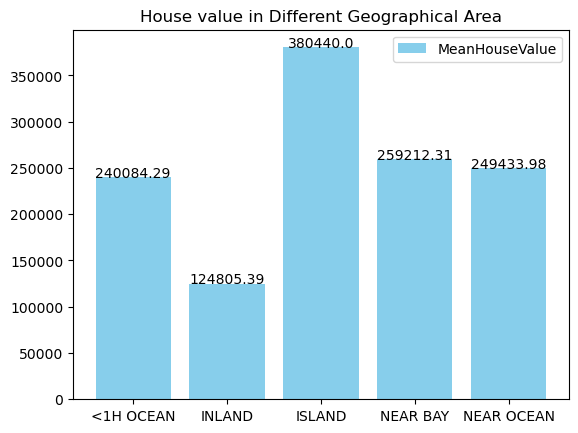

In [22]:
x=house_value_df.Ocean_proximity
y=house_value_df.Mean
plt.bar(x,y,color='skyblue',label='MeanHouseValue')
plt.title('House value in Different Geographical Area')
for i,v in enumerate(y):
    plt.text(i,v+100,str(v),ha='center')
plt.legend()
plt.show()

In [24]:
# Find total house holds in each geographical area using groupby
household_count=df.groupby('Ocean_proximity')['Households'].sum()
household_df=household_count.reset_index(name='Count')

print(household_df)

  Ocean_proximity    Count
0       <1H OCEAN  4730118
1          INLAND  3127759
2          ISLAND     1383
3        NEAR BAY  1118931
4      NEAR OCEAN  1332308


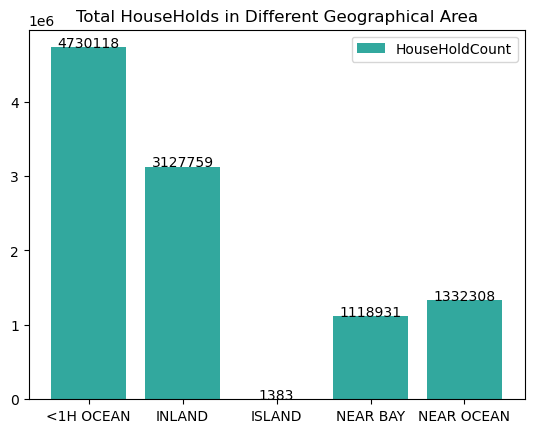

In [26]:
# Visualization of total house holds in each geographical area
x=household_df.Ocean_proximity
y=household_df.Count
plt.bar(x,y,color='#32a89e',label='HouseHoldCount')
plt.title('Total HouseHolds in Different Geographical Area')
for i, v in enumerate(y):
    plt.text(i, v + 100, str(v), ha='center')
   
plt.legend()
plt.show()

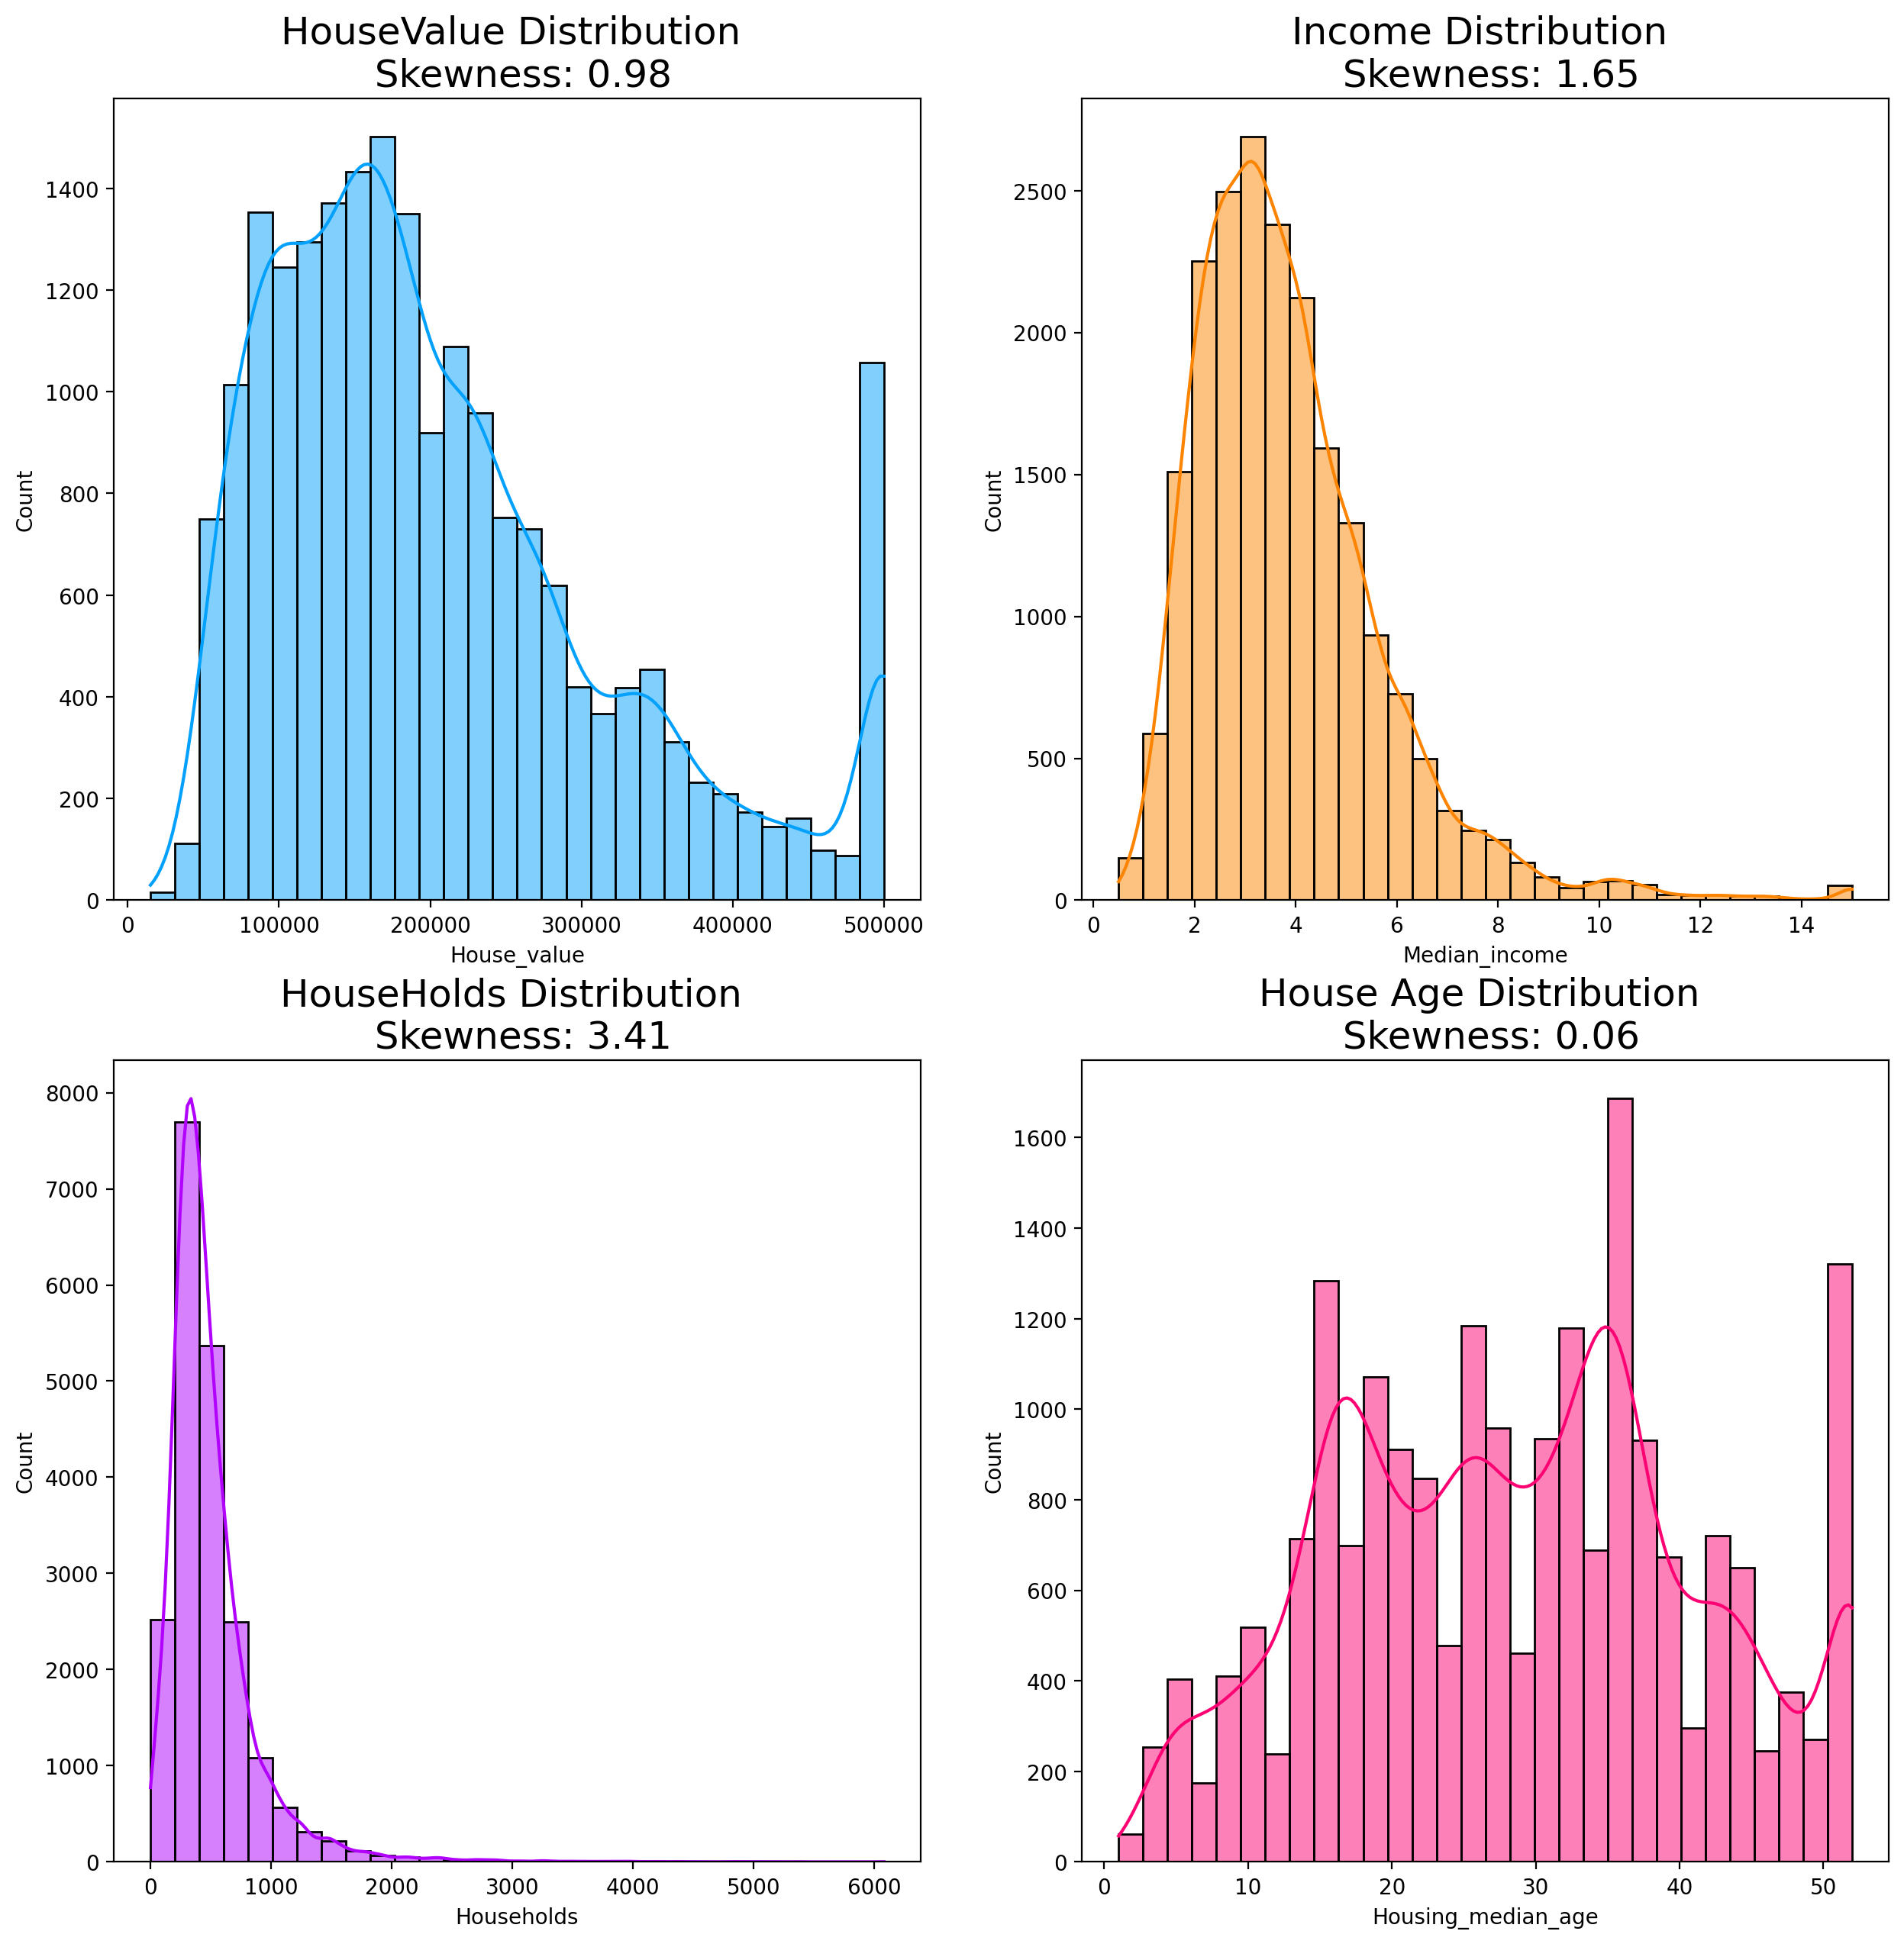

In [28]:
# Shape of Distribution
# Finding skewness of distributions
skew_houseValue=stats.skew(df['House_value'])
skew_income=stats.skew(df['Median_income'])
skew_houseHold=stats.skew(df['Households'])
skew_houseAge=stats.skew(df['Housing_median_age'])

plt.figure(figsize=(15,15),dpi=200)
# Histogram of HouseValue Distribution
plt.subplot(2,2,1)
sns.histplot(df['House_value'],bins=30,kde=True,color='#03a1fc')
plt.title(f'HouseValue Distribution \n Skewness: {skew_houseValue:.2f}',fontsize=18)

# Histogram of MedianIncome Distribution
plt.subplot(2,2,2)
sns.histplot(df['Median_income'],bins=30,kde=True,color='#fc8403')
plt.title(f'Income Distribution \n Skewness: {skew_income:.2f}',fontsize=18)

# Histogram of HouseHolds Distribution
plt.subplot(2,2,3)
sns.histplot(df['Households'],bins=30,kde=True,color='#b103fc')
plt.title(f'HouseHolds Distribution \n Skewness: {skew_houseHold:.2f}',fontsize=18)

# Histogram of HouseValue Distribution
plt.subplot(2,2,4)
sns.histplot(df['Housing_median_age'],bins=30,kde=True,color='#fc0373')
plt.title(f'House Age Distribution \n Skewness: {skew_houseAge:.2f}',fontsize=18)
plt.show()

Lower Fence is -620.0
 Higher Fence is 3132.0


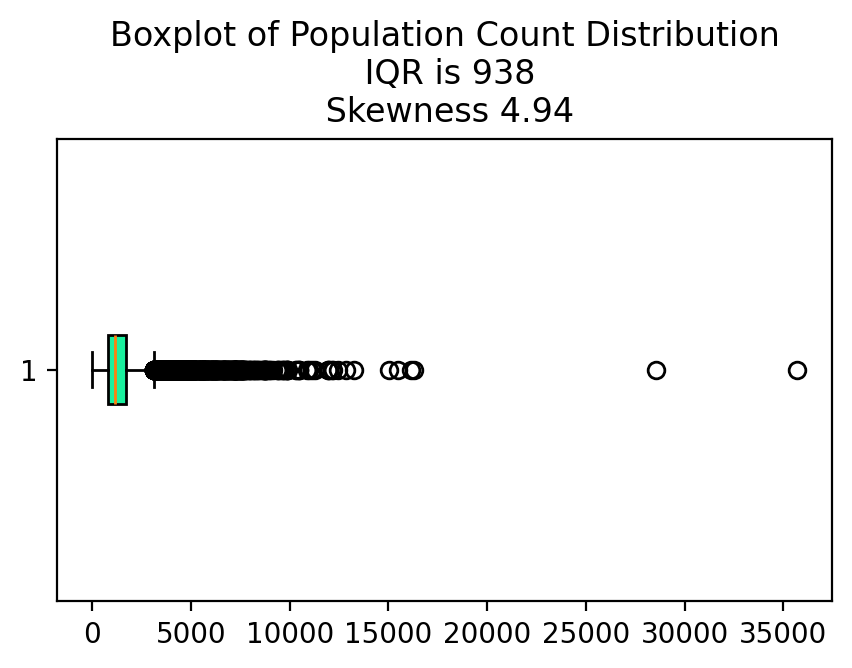

In [29]:
#Boxplot of Population
skew_pop=stats.skew(df['Population'])
#Calculate IQR
q1=np.percentile(df['Population'],25)
q3=np.percentile(df['Population'],75)
iqr=(q3-q1)
# Lower fence and Higher fence
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)
print(f'Lower Fence is {lower_fence}\n Higher Fence is {higher_fence}')
#Adjusting figure size
plt.figure(figsize=(5,3),dpi=200)
plt.boxplot(df['Population'],vert=False,patch_artist=True,boxprops=dict(facecolor='#1af09e'))
plt.title(f'Boxplot of Population Count Distribution\n IQR is {iqr:.0f}\n Skewness {skew_pop:.2f}')
plt.show()

# Hypothesis test,ANOVA

In [33]:
# Hypothesis test
# Anova test between OceanProximity and Housevalue(target)
df['Ocean_proximity'].unique()
nb_gp=df.loc[df['Ocean_proximity']=='NEAR BAY']['House_value']
ohOc_gp=df.loc[df['Ocean_proximity']=='<1H OCEAN']['House_value']
in_gp=df.loc[df['Ocean_proximity']=='INLAND']['House_value']
is_gp=df.loc[df['Ocean_proximity']=='ISLAND']['House_value']
no_gp=df.loc[df['Ocean_proximity']=='NEAR OCEAN']['House_value']
# One Way Anova
#Set Significance level
alpha=0.05
anovaResult,p=stats.f_oneway(nb_gp,no_gp,ohOc_gp,in_gp,is_gp)
print(f'Statistics is {anovaResult}\n Pvalue is {p}')
if p<alpha:
    print(f'Reject Null Hypothesis.Means of atleat one group is different')
    tukey=pairwise_tukeyhsd(endog=df['House_value'],groups=df['Ocean_proximity'],alpha=alpha)
    print(tukey)
else:
    print(f'Failed to reject Null Hypothesis.That mean there is no difference between gropus')

Statistics is 1612.1407358838217
 Pvalue is 0.0
Reject Null Hypothesis.Means of atleat one group is different
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1    group2     meandiff   p-adj     lower        upper     reject
-------------------------------------------------------------------------
<1H OCEAN     INLAND -115278.8935    0.0 -119727.9273 -110829.8596   True
<1H OCEAN     ISLAND  140355.7145 0.0158   17424.7149  263286.7142   True
<1H OCEAN   NEAR BAY   19128.0263    0.0   12705.8987   25550.1539   True
<1H OCEAN NEAR OCEAN     9349.692 0.0002    3293.4581   15405.9258   True
   INLAND     ISLAND   255634.608    0.0  132690.3424  378578.8736   True
   INLAND   NEAR BAY  134406.9198    0.0  127735.6768  141078.1628   True
   INLAND NEAR OCEAN  124628.5854    0.0  118308.7968  130948.3741   True
   ISLAND   NEAR BAY -121227.6882 0.0557 -244259.1568    1803.7804  False
   ISLAND NEAR OCEAN -131006.0226 0.0302 -254018.9345   -7993.1106   True
 N

# Data Transformation

In [36]:
#Label encode Ocean_proximity feature
l_opEncoder=LabelEncoder()
df['Ocean_proximity']=l_opEncoder.fit_transform(df['Ocean_proximity'])
# Standardize data
scaler=StandardScaler()
df[['Longitude','Latitude','Housing_median_age','Total_rooms','Total_bedrooms','Population','Households','Median_income','House_value']]=scaler.fit_transform(df[['Longitude','Latitude','Housing_median_age','Total_rooms','Total_bedrooms','Population','Households','Median_income','House_value']])

df.head()

,Longitude,Latitude,Housing_median_age,Total_rooms,Total_bedrooms,Population,Households,Median_income,Ocean_proximity,House_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,3,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,3,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,3,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,3,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,3,1.172900


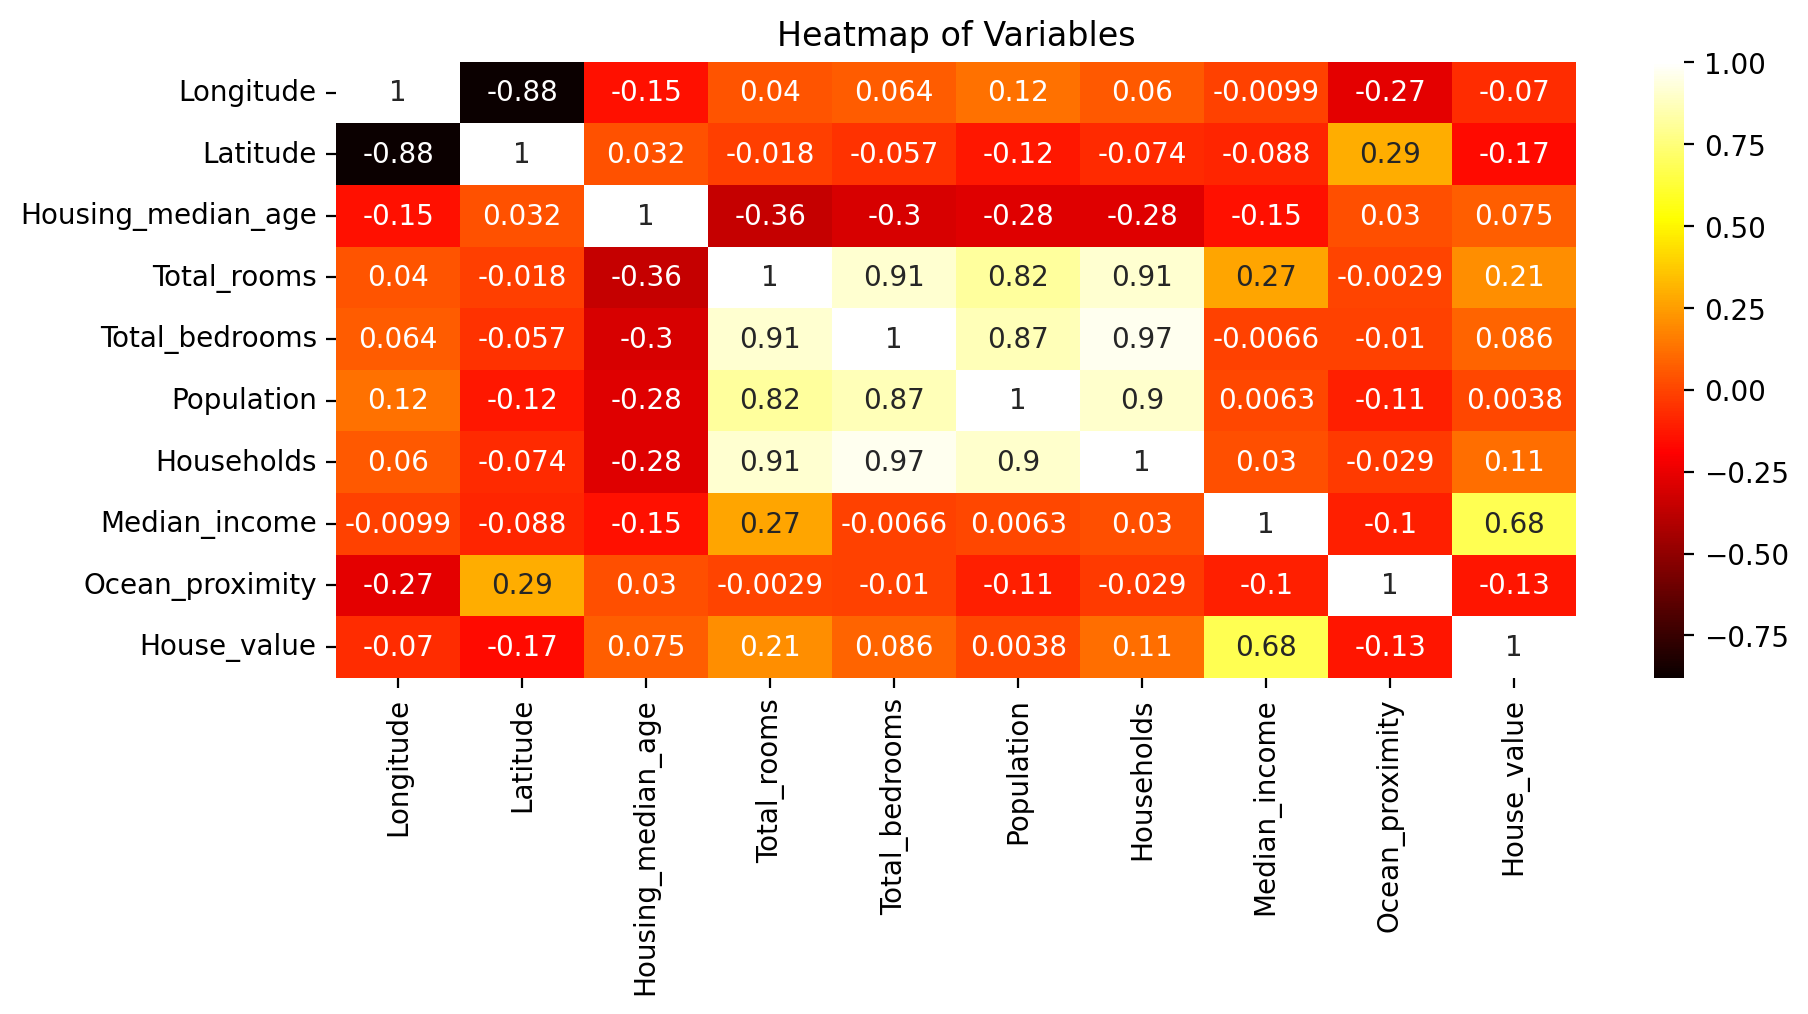

In [38]:
# Heat map showing correlation between variables
corr_matrix=df.corr(method='spearman')
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(corr_matrix,annot=True,cmap='hot')
plt.title('Heatmap of Variables')
plt.show()

# Principal Component Analysis

In [41]:
#PCA for dimensinality reduction
pca=PCA(n_components=2)
pca_result=pca.fit_transform(df)
print(f'Exaplained Variance Ratio is {pca.explained_variance_ratio_}')
# Create a DataFrame of principal components
pca_df=pd.DataFrame(pca_result,columns=['PC1','PC2'])
pca_df.head()

Exaplained Variance Ratio is [0.35593206 0.22246164]


,PC1,PC2
0,-2.172682,2.325080
1,2.790282,3.022948
2,-2.094939,2.374181
3,-2.057932,2.379660
4,-1.926673,2.410161


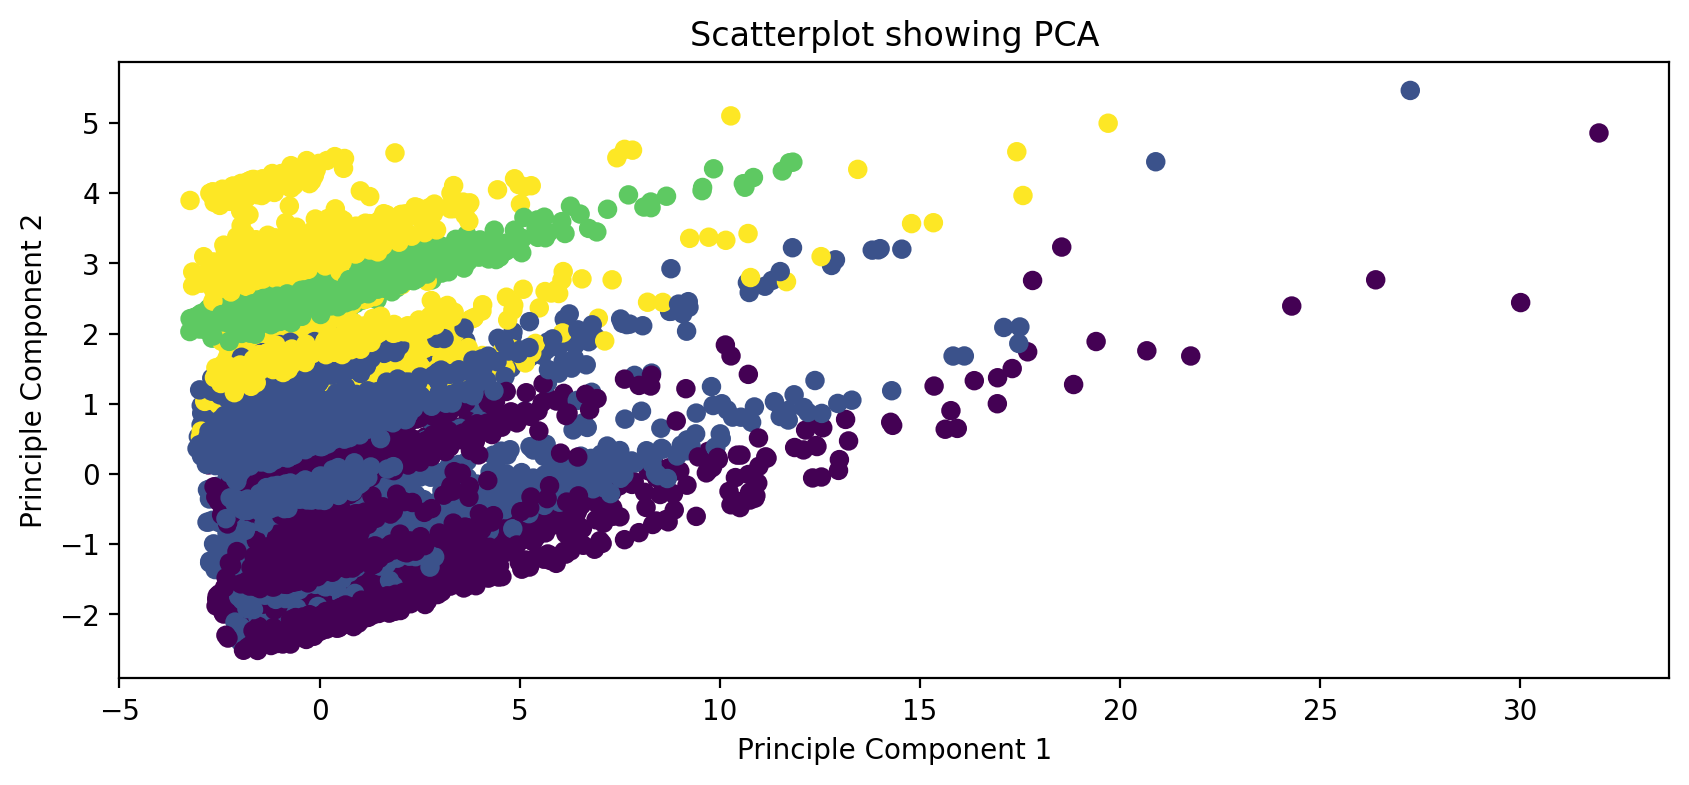

In [43]:
#Visualize the principle components with target variable Ocean_proximity
plt.figure(figsize=(10,4),dpi=200)
plt.scatter(pca_df['PC1'],pca_df['PC2'],c=df['Ocean_proximity'])
plt.title('Scatterplot showing PCA')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()

# Predictive Modelling using Linear Regression

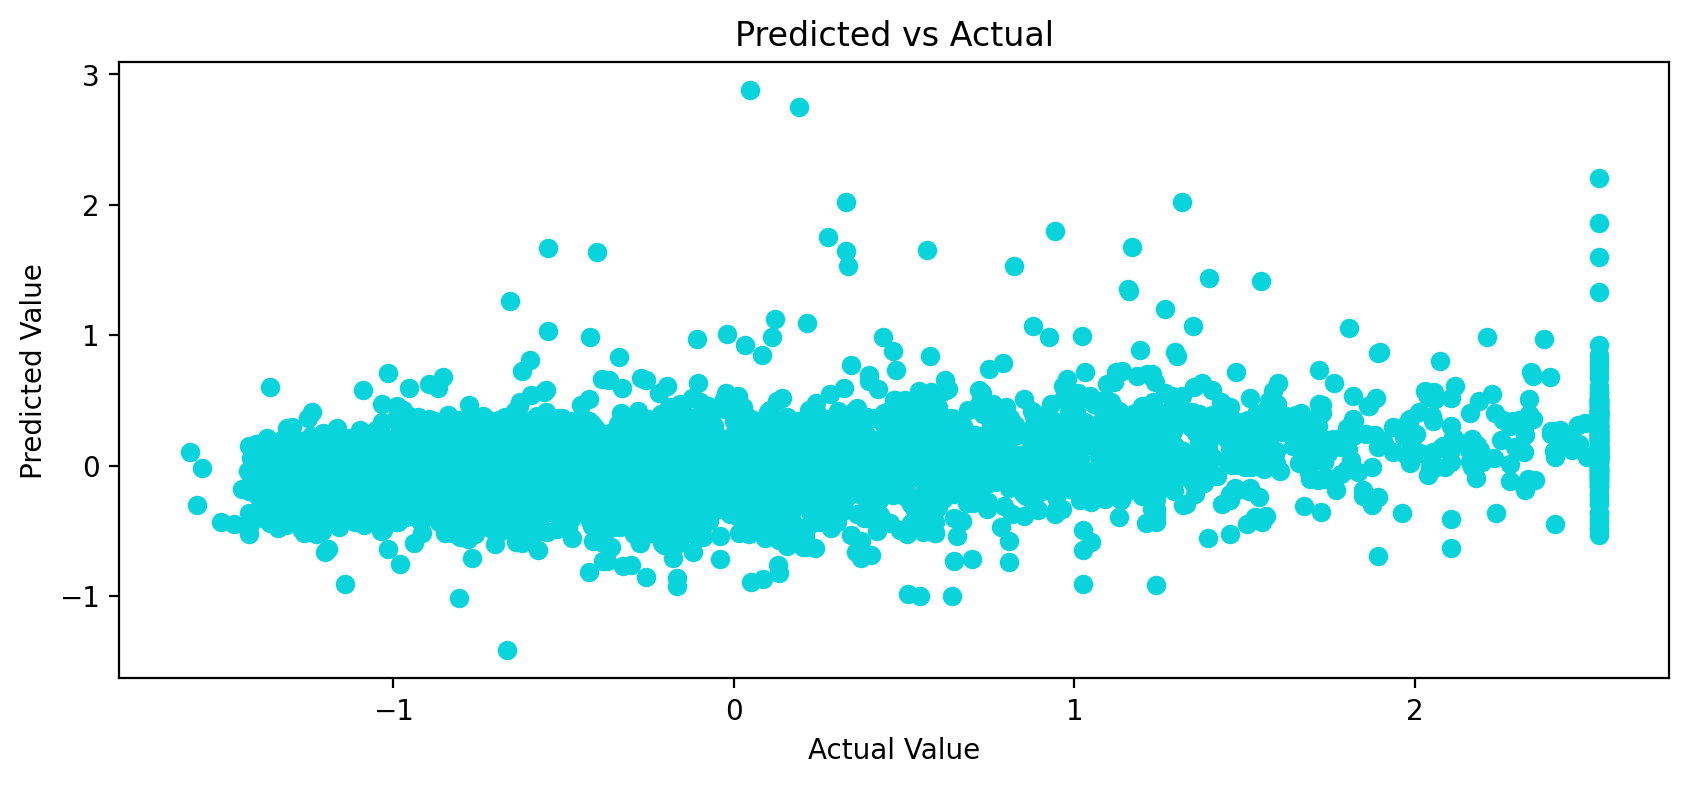

In [46]:
# Collect Data
X=df[['Housing_median_age','Total_rooms','Total_bedrooms','Ocean_proximity']]
Y=df['House_value']
# Split data into training set and testing set(80%-20%)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

#Initialize the model
model=LinearRegression()

#Train the model on training data
model.fit(X_train,Y_train)

#Perform prediction on test set using the trained model
Y_pred=model.predict(X_test)

# Visualize the actual value and predicted value
plt.figure(figsize=(10,4),dpi=200)
plt.scatter(Y_test,Y_pred,color='#09d4db')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Evaluation Metrics of model

In [49]:
#Metrics od model
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print(f'Mean Squared Error is {mse}\n Mean Absolute Error is {mae}\n R squared is {r2}')

Mean Squared Error is 0.9248589286133875
 Mean Absolute Error is 0.7605528622780356
 R squared is 0.09100190564864608


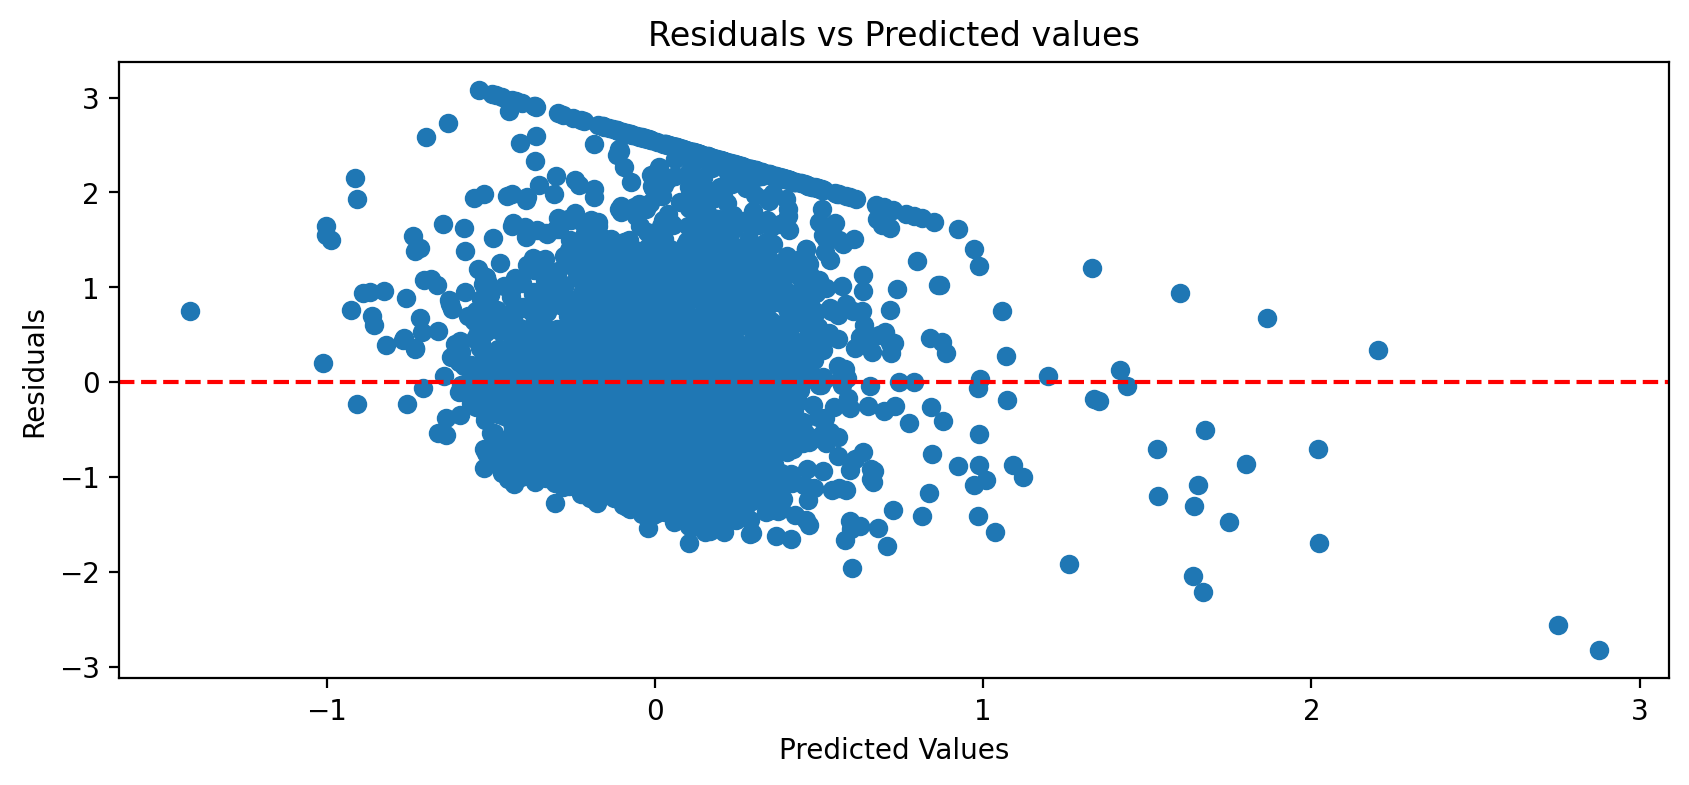

In [51]:
# CAlculate Residuals
residuals=Y_test-Y_pred
# plot residuals
plt.figure(figsize=(10,4),dpi=200)
plt.scatter(Y_pred,residuals)
plt.axhline(0,color='red',linestyle='--')
plt.title('Residuals vs Predicted values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Export Dataset as CSV

In [54]:
df.to_csv('House_price_transformed.csv')